<a href="https://colab.research.google.com/github/hannz0/Sentiment-analysis-e-wallet/blob/main/ewallet_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Library

In [ ]:
!pip install --upgrade gspread
!pip install pandas

In [ ]:
from google.colab import auth
auth.authenticate_user()
import gspread
import pandas as pd
from oauth2client.client import GoogleCredentials
from google.auth import default
import string
import re
import nltk
from nltk.stem.snowball import SnowballStemmer
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import pickle
from sklearn.model_selection import train_test_split as tts
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Connect to Google Sheet

In [ ]:
creds, _ = default()

gc = gspread.authorize(creds)

wb = gc.open_by_key('1_r12mMz4Jnaw75hyRlz9EDeoJqNp-kXffIv_2JH4k80')
ws = wb.worksheet('master')

In [ ]:
rows = ws.get_all_values()
df = pd.DataFrame.from_records(rows[1:],columns=rows[0])
print(df)

                   at id_user ewallet score  \
0       7/11/22 14:45       1    DANA     1   
1       7/11/22 14:16       2    DANA     5   
2        7/11/22 9:29       3    DANA     1   
3        7/11/22 3:13       4    DANA     1   
4       6/11/22 10:21       5    DANA     1   
..                ...     ...     ...   ...   
941  08/01/2021 17:05     942     OVO     4   
942  07/01/2021 16:15     943     OVO     1   
943  03/01/2021 18:47     944     OVO     2   
944   03/01/2021 5:09     945     OVO     1   
945   03/01/2021 1:14     946     OVO     1   

                                           old_content  \
0    After top up my money then the application can...   
1    The app just downloaded and installed with no ...   
2    can not received OTP, and have reported to the...   
3         Bad experience, apps not stable and many bug   
4    Cancelled my order with a voucher that i bough...   
..                                                 ...   
941  Not support in android 1

In [ ]:
df[df["ewallet"] == 'OVO']

,at,id_user,ewallet,score,old_content,content
474,8/11/22 10:50,475,OVO,5,Fast and easy,Fast and Easy
475,8/11/22 6:08,476,OVO,5,Bagus fast response,Good fast response
476,7/11/22 15:41,477,OVO,5,Easy to pay but thing has to be concerned: sal...,Easy to pay but this has to be concerned: Sale...
477,6/11/22 5:42,478,OVO,1,How do you convert to English?,How do you convert to English?
478,5/11/22 15:44,479,OVO,2,transfer fee is too high,transfer fee is too high
...,...,...,...,...,...,...
941,08/01/2021 17:05,942,OVO,4,"Not support in android 11, always force close ...","Not Support in Android 11, Always Force Close ..."
942,07/01/2021 16:15,943,OVO,1,it is not working properly now. The app keep r...,It is not working Properly Now. The App Keep R...
943,03/01/2021 18:47,944,OVO,2,The app keep restarting every 30second It make...,The App Keep Restarting Every 30Second it Make...
944,03/01/2021 5:09,945,OVO,1,Uninstall your OVO now because it is not good ...,Uninstall your Ovo now because it is not good ...


In [ ]:
df[df["ewallet"] == 'DANA']

,at,id_user,ewallet,score,old_content,content
0,7/11/22 14:45,1,DANA,1,After top up my money then the application can...,After top up my money then the application can...
1,7/11/22 14:16,2,DANA,5,The app just downloaded and installed with no ...,The app just downloaded and install with no mo...
2,7/11/22 9:29,3,DANA,1,"can not received OTP, and have reported to the...","Can not receive OTP, and have reported to the ..."
3,7/11/22 3:13,4,DANA,1,"Bad experience, apps not stable and many bug","Bad experience, apps not stable and many bugs"
4,6/11/22 10:21,5,DANA,1,Cancelled my order with a voucher that i bough...,Cancelled My Order with a Voucher that I bough...
...,...,...,...,...,...,...
469,04/07/2019 9:43,470,DANA,1,Top up 200k twice in one night (one through BR...,Top up 200k twice in one night (one through BR...
470,30/06/2019 09:36,471,DANA,5,I really enjoyed this app. it is ease me to do...,I really enjoy this app. It is ease me to do a...
471,29/06/2019 07:47,472,DANA,1,same as Rusman HL. my comment was deleted by d...,Same As Rusman Hl. My comment was deleted by D...
472,26/06/2019 15:04,473,DANA,5,"love using this app!! very handy, one of the f...","love using this app !! Very Handy, One of the ..."


In [ ]:
df.head()

,at,id_user,ewallet,score,old_content,content
0,7/11/22 14:45,1,DANA,1,After top up my money then the application can...,After top up my money then the application can...
1,7/11/22 14:16,2,DANA,5,The app just downloaded and installed with no ...,The app just downloaded and install with no mo...
2,7/11/22 9:29,3,DANA,1,"can not received OTP, and have reported to the...","Can not receive OTP, and have reported to the ..."
3,7/11/22 3:13,4,DANA,1,"Bad experience, apps not stable and many bug","Bad experience, apps not stable and many bugs"
4,6/11/22 10:21,5,DANA,1,Cancelled my order with a voucher that i bough...,Cancelled My Order with a Voucher that I bough...


#Data Preprocessing

### Remove Punctuation & Case folding

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

#storing the puntuation free text
df['clean_msg']= df['content'].apply(lambda x:remove_punctuation(x))

#lowering text
df['msg_lower'] = df['clean_msg'].apply(lambda x: x.lower())
df.head()

,at,id_user,ewallet,score,old_content,content,clean_msg,msg_lower
0,7/11/22 14:45,1,DANA,1,After top up my money then the application can...,After top up my money then the application can...,After top up my money then the application can...,after top up my money then the application can...
1,7/11/22 14:16,2,DANA,5,The app just downloaded and installed with no ...,The app just downloaded and install with no mo...,The app just downloaded and install with no mo...,the app just downloaded and install with no mo...
2,7/11/22 9:29,3,DANA,1,"can not received OTP, and have reported to the...","Can not receive OTP, and have reported to the ...",Can not receive OTP and have reported to the c...,can not receive otp and have reported to the c...
3,7/11/22 3:13,4,DANA,1,"Bad experience, apps not stable and many bug","Bad experience, apps not stable and many bugs",Bad experience apps not stable and many bugs,bad experience apps not stable and many bugs
4,6/11/22 10:21,5,DANA,1,Cancelled my order with a voucher that i bough...,Cancelled My Order with a Voucher that I bough...,Cancelled My Order with a Voucher that I bough...,cancelled my order with a voucher that i bough...


### Tokenization
Text is being split into smaller units.

In [ ]:
#defining function for tokenization
def tokenization(text):
    tokens = re.split(r'\W+',text)
    return tokens

#applying function to the column
df['msg_tokenied'] = df['msg_lower'].apply(lambda x: tokenization(x))
df.head()

,at,id_user,ewallet,score,old_content,content,clean_msg,msg_lower,msg_tokenied
0,7/11/22 14:45,1,DANA,1,After top up my money then the application can...,After top up my money then the application can...,After top up my money then the application can...,after top up my money then the application can...,"[after, top, up, my, money, then, the, applica..."
1,7/11/22 14:16,2,DANA,5,The app just downloaded and installed with no ...,The app just downloaded and install with no mo...,The app just downloaded and install with no mo...,the app just downloaded and install with no mo...,"[the, app, just, downloaded, and, install, wit..."
2,7/11/22 9:29,3,DANA,1,"can not received OTP, and have reported to the...","Can not receive OTP, and have reported to the ...",Can not receive OTP and have reported to the c...,can not receive otp and have reported to the c...,"[can, not, receive, otp, and, have, reported, ..."
3,7/11/22 3:13,4,DANA,1,"Bad experience, apps not stable and many bug","Bad experience, apps not stable and many bugs",Bad experience apps not stable and many bugs,bad experience apps not stable and many bugs,"[bad, experience, apps, not, stable, and, many..."
4,6/11/22 10:21,5,DANA,1,Cancelled my order with a voucher that i bough...,Cancelled My Order with a Voucher that I bough...,Cancelled My Order with a Voucher that I bough...,cancelled my order with a voucher that i bough...,"[cancelled, my, order, with, a, voucher, that,..."


### Stopwords
Text is converted into the same case preferably lower case.

In [ ]:
list_sw = ['only','apps', 'app', 'for',"hasn't",'my','have','themselves',"haven't",'too',
"mustn't",'when',"don't","wasn't",'she','yourselves',"wouldn't",
"mightn't",'doing','then','over','no','so','more','ma','there',
'be','o','ve','won','while','with','your','itself','them',
'very','a',"couldn't","needn't","should've","you'd","isn't",
'again','y','these','between','of','but','below','down',
'myself',"you're",'to','those','d','most','as',"that'll",'our',
'theirs','not','will','don','under','off','during','needn',
'after',"aren't",'on','were','i','s','m','was','hadn','is',
'mightn','shan','do','all','from',"it's",'we','ain','where',
'whom','in','nor','ours','further','t','his','ourselves','can',
"doesn't",'ll','and','other','if','him','hers','has','few',
'couldn','being','here','up','just',"won't",'re','into',
'should','what','their','out','now',"hadn't",'didn','because',
'at','which','herself','or','by','are',"didn't","shan't",'hasn',
'some',"weren't",'am','wouldn','weren','this','same','mustn',
'they','any','above','its','own',"you'll",'yourself','against',
'through','how','you','why','doesn','yours','been','me',
"shouldn't",'had','her',"she's",'that','than','who','aren',
'does','about','shouldn','haven','it','each','the','an','such',
'he','did','wasn','himself','once','isn','both','before','having',
'until',"you've", 'dana', 'tri', 'ovo', 'merchant',
'alway', 'always', 'card', 'account', 'money']

In [ ]:
#importing nlp library
nltk.download('stopwords')

#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:190]
# ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
list_sw

#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

#applying the function
df['no_stopwords'] = df['msg_tokenied'].apply(lambda x:remove_stopwords(x))
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,at,id_user,ewallet,score,old_content,content,clean_msg,msg_lower,msg_tokenied,no_stopwords
0,7/11/22 14:45,1,DANA,1,After top up my money then the application can...,After top up my money then the application can...,After top up my money then the application can...,after top up my money then the application can...,"[after, top, up, my, money, then, the, applica...","[top, money, application, opened, error, stuck..."
1,7/11/22 14:16,2,DANA,5,The app just downloaded and installed with no ...,The app just downloaded and install with no mo...,The app just downloaded and install with no mo...,the app just downloaded and install with no mo...,"[the, app, just, downloaded, and, install, wit...","[app, downloaded, install, money, transferred,..."
2,7/11/22 9:29,3,DANA,1,"can not received OTP, and have reported to the...","Can not receive OTP, and have reported to the ...",Can not receive OTP and have reported to the c...,can not receive otp and have reported to the c...,"[can, not, receive, otp, and, have, reported, ...","[receive, otp, reported, customer, care, via, ..."
3,7/11/22 3:13,4,DANA,1,"Bad experience, apps not stable and many bug","Bad experience, apps not stable and many bugs",Bad experience apps not stable and many bugs,bad experience apps not stable and many bugs,"[bad, experience, apps, not, stable, and, many...","[bad, experience, apps, stable, many, bugs]"
4,6/11/22 10:21,5,DANA,1,Cancelled my order with a voucher that i bough...,Cancelled My Order with a Voucher that I bough...,Cancelled My Order with a Voucher that I bough...,cancelled my order with a voucher that i bough...,"[cancelled, my, order, with, a, voucher, that,...","[cancelled, order, voucher, bought, earlier, o..."


### **Stemming**
It is also known as the text standardization step where the words are stemmed or diminished to their root/base form.  For example, words like ‘programmer’, ‘programming, ‘program’ will be stemmed to ‘program’.

In [ ]:
 #the stemmer requires a language parameter
snow_stemmer = SnowballStemmer(language='english')


#defining a function for stemming
def stemming(text):
  stem_text = [snow_stemmer.stem(word) for word in text]
  return stem_text
df['msg_stemmed'] = df['no_stopwords'].apply(lambda x: stemming(x))
df.head()

,at,id_user,ewallet,score,old_content,content,clean_msg,msg_lower,msg_tokenied,no_stopwords,msg_stemmed
0,7/11/22 14:45,1,DANA,1,After top up my money then the application can...,After top up my money then the application can...,After top up my money then the application can...,after top up my money then the application can...,"[after, top, up, my, money, then, the, applica...","[top, money, application, opened, error, stuck...","[top, money, applic, open, error, stuck, reall..."
1,7/11/22 14:16,2,DANA,5,The app just downloaded and installed with no ...,The app just downloaded and install with no mo...,The app just downloaded and install with no mo...,the app just downloaded and install with no mo...,"[the, app, just, downloaded, and, install, wit...","[app, downloaded, install, money, transferred,...","[app, download, instal, money, transfer, new, ..."
2,7/11/22 9:29,3,DANA,1,"can not received OTP, and have reported to the...","Can not receive OTP, and have reported to the ...",Can not receive OTP and have reported to the c...,can not receive otp and have reported to the c...,"[can, not, receive, otp, and, have, reported, ...","[receive, otp, reported, customer, care, via, ...","[receiv, otp, report, custom, care, via, email..."
3,7/11/22 3:13,4,DANA,1,"Bad experience, apps not stable and many bug","Bad experience, apps not stable and many bugs",Bad experience apps not stable and many bugs,bad experience apps not stable and many bugs,"[bad, experience, apps, not, stable, and, many...","[bad, experience, apps, stable, many, bugs]","[bad, experi, app, stabl, mani, bug]"
4,6/11/22 10:21,5,DANA,1,Cancelled my order with a voucher that i bough...,Cancelled My Order with a Voucher that I bough...,Cancelled My Order with a Voucher that I bough...,cancelled my order with a voucher that i bough...,"[cancelled, my, order, with, a, voucher, that,...","[cancelled, order, voucher, bought, earlier, o...","[cancel, order, voucher, bought, earlier, orde..."


#Labeling

In [ ]:
df['msg_stemmed'] = df.msg_stemmed.apply(lambda x: ', '.join([str(i) for i in x]))

In [ ]:
df.tail()

,at,id_user,ewallet,score,old_content,content,clean_msg,msg_lower,msg_tokenied,no_stopwords,msg_stemmed
941,08/01/2021 17:05,942,OVO,4,"Not support in android 11, always force close ...","Not Support in Android 11, Always Force Close ...",Not Support in Android 11 Always Force Close A...,not support in android 11 always force close a...,"[not, support, in, android, 11, always, force,...","[support, android, 11, always, force, close, o...","support, android, 11, alway, forc, close, open..."
942,07/01/2021 16:15,943,OVO,1,it is not working properly now. The app keep r...,It is not working Properly Now. The App Keep R...,It is not working Properly Now The App Keep Re...,it is not working properly now the app keep re...,"[it, is, not, working, properly, now, the, app...","[working, properly, app, keep, restarting, eve...","work, proper, app, keep, restart, everi, 10s, ..."
943,03/01/2021 18:47,944,OVO,2,The app keep restarting every 30second It make...,The App Keep Restarting Every 30Second it Make...,The App Keep Restarting Every 30Second it Make...,the app keep restarting every 30second it make...,"[the, app, keep, restarting, every, 30second, ...","[app, keep, restarting, every, 30second, makes...","app, keep, restart, everi, 30second, make, har..."
944,03/01/2021 5:09,945,OVO,1,Uninstall your OVO now because it is not good ...,Uninstall your Ovo now because it is not good ...,Uninstall your Ovo now because it is not good ...,uninstall your ovo now because it is not good ...,"[uninstall, your, ovo, now, because, it, is, n...","[uninstall, ovo, good, anymore, application, k...","uninstal, ovo, good, anymor, applic, keep, log..."
945,03/01/2021 1:14,946,OVO,1,I can not even login anymore after I put my pr...,I can not even login Anymore after I put my pr...,I can not even login Anymore after I put my pr...,i can not even login anymore after i put my pr...,"[i, can, not, even, login, anymore, after, i, ...","[even, login, anymore, put, private, code, kee...","even, login, anymor, put, privat, code, keep, ..."


In [ ]:
df.shape

(946, 11)

In [ ]:
dfcontent = df[['content','clean_msg','msg_lower','msg_tokenied','no_stopwords','msg_stemmed']]

In [ ]:
dfcontent.head(15)

,content,clean_msg,msg_lower,msg_tokenied,no_stopwords,msg_stemmed
0,After top up my money then the application can...,After top up my money then the application can...,after top up my money then the application can...,"[after, top, up, my, money, then, the, applica...","[top, money, application, opened, error, stuck...","top, money, applic, open, error, stuck, realli..."
1,The app just downloaded and install with no mo...,The app just downloaded and install with no mo...,the app just downloaded and install with no mo...,"[the, app, just, downloaded, and, install, wit...","[app, downloaded, install, money, transferred,...","app, download, instal, money, transfer, new, c..."
2,"Can not receive OTP, and have reported to the ...",Can not receive OTP and have reported to the c...,can not receive otp and have reported to the c...,"[can, not, receive, otp, and, have, reported, ...","[receive, otp, reported, customer, care, via, ...","receiv, otp, report, custom, care, via, email,..."
3,"Bad experience, apps not stable and many bugs",Bad experience apps not stable and many bugs,bad experience apps not stable and many bugs,"[bad, experience, apps, not, stable, and, many...","[bad, experience, apps, stable, many, bugs]","bad, experi, app, stabl, mani, bug"
4,Cancelled My Order with a Voucher that I bough...,Cancelled My Order with a Voucher that I bough...,cancelled my order with a voucher that i bough...,"[cancelled, my, order, with, a, voucher, that,...","[cancelled, order, voucher, bought, earlier, o...","cancel, order, voucher, bought, earlier, order..."
5,I download this app but they have made very di...,I download this app but they have made very di...,i download this app but they have made very di...,"[i, download, this, app, but, they, have, made...","[download, app, made, difference, use, keep, s...","download, app, made, differ, use, keep, strugg..."
6,"I have to use my DANA right now. But it says ""...",I have to use my DANA right now But it says sy...,i have to use my dana right now but it says sy...,"[i, have, to, use, my, dana, right, now, but, ...","[use, dana, right, says, system, busy, please,...","use, dana, right, say, system, busi, pleas, tr..."
7,"Wow, amazing, how you do you do with your grea...",Wow amazing how you do you do with your great ...,wow amazing how you do you do with your great ...,"[wow, amazing, how, you, do, you, do, with, yo...","[wow, amazing, great, idea, application]","wow, amaz, great, idea, applic"
8,"There is no language option on this app, pls a...",There is no language option on this app pls ad...,there is no language option on this app pls ad...,"[there, is, no, language, option, on, this, ap...","[language, option, app, pls, add, language, op...","languag, option, app, pls, add, languag, optio..."
9,It always force close whenever I try to use it...,It always force close whenever I try to use it...,it always force close whenever i try to use it...,"[it, always, force, close, whenever, i, try, t...","[always, force, close, whenever, try, use, hel...","alway, forc, close, whenev, tri, use, hell,"


In [ ]:
dfstemmed = df['msg_stemmed'].to_frame().join(df['content'].to_frame())
dfstemmed = dfstemmed.join(df['ewallet'])
dfstemmed.tail()

,msg_stemmed,content,ewallet
941,"support, android, 11, alway, forc, close, open...","Not Support in Android 11, Always Force Close ...",OVO
942,"work, proper, app, keep, restart, everi, 10s, ...",It is not working Properly Now. The App Keep R...,OVO
943,"app, keep, restart, everi, 30second, make, har...",The App Keep Restarting Every 30Second it Make...,OVO
944,"uninstal, ovo, good, anymor, applic, keep, log...",Uninstall your Ovo now because it is not good ...,OVO
945,"even, login, anymor, put, privat, code, keep, ...",I can not even login Anymore after I put my pr...,OVO


In [ ]:
dfstemmed.shape

(946, 3)

##Polarity & Subjectivity

In [ ]:
# Add polarities and subjectivities into the DataFrame by using TextBlob
dfstemmed["Polarity"] = dfstemmed["msg_stemmed"].apply(lambda word: TextBlob(word).sentiment.polarity)
dfstemmed["Subjectivity"] = dfstemmed["msg_stemmed"].apply(lambda word: TextBlob(word).sentiment.subjectivity)

In [ ]:
dfstemmed.shape

(946, 5)

In [ ]:
# Display the Polarity and Subjectivity columns
display(dfstemmed[["Polarity","Subjectivity","msg_stemmed"]].head(9))
dfstemmed.drop(dfstemmed[dfstemmed['Polarity'] == 0.000000	].index, inplace = True)

,Polarity,Subjectivity,msg_stemmed
0,0.050000,0.450000,"top, money, applic, open, error, stuck, realli..."
1,-0.181818,0.727273,"app, download, instal, money, transfer, new, c..."
2,-0.050000,0.400000,"receiv, otp, report, custom, care, via, email,..."
3,-0.700000,0.666667,"bad, experi, app, stabl, mani, bug"
4,0.150000,0.250000,"cancel, order, voucher, bought, earlier, order..."
5,0.142857,0.301190,"download, app, made, differ, use, keep, strugg..."
6,0.142857,0.267857,"use, dana, right, say, system, busi, pleas, tr..."
7,0.450000,0.875000,"wow, amaz, great, idea, applic"
8,0.000000,0.000000,"languag, option, app, pls, add, languag, optio..."


In [ ]:
dfstemmed.shape

(716, 5)

In [ ]:
# Define a function to classify polarities
def getAnalysis(score):
    if score > 0:
        return "Positif"
    else:
        return "Negatif"

# Apply the funtion on Polarity column and add the results into a new column
dfstemmed["Label"] = dfstemmed["Polarity"].apply(getAnalysis)

# Display the Polarity and Subjectivity Analysis
dflabel = dfstemmed[["Label","msg_stemmed"]]
display(dflabel.tail())

,Label,msg_stemmed
934,Negatif,"omg, want, abl, login, grab, account, reinstal..."
937,Negatif,"got, block, account, 6x, pin, fail, wrong, ser..."
939,Positif,"major, bug, transfer, app, alway, crash, secon..."
943,Negatif,"app, keep, restart, everi, 30second, make, har..."
944,Positif,"uninstal, ovo, good, anymor, applic, keep, log..."


In [ ]:
dfstemmed[['msg_stemmed','Polarity','Subjectivity','Label']][6:11]

,msg_stemmed,Polarity,Subjectivity,Label
6,"use, dana, right, say, system, busi, pleas, tr...",0.142857,0.267857,Positif
7,"wow, amaz, great, idea, applic",0.450000,0.875000,Positif
10,"simpl, perfect",1.000000,1.000000,Positif
12,"use, app, 2, year, idk, app, still, bad, mani,...",-0.700000,0.666667,Negatif
14,"terribl, ive, upgrad, account, account, premiu...",-0.175000,0.400000,Negatif


In [ ]:
dfstemmed.shape

(716, 6)

In [ ]:
print(dfstemmed["Label"].value_counts())

Positif    440
Negatif    276
Name: Label, dtype: int64


In [ ]:
dflabel = dflabel.join(dfstemmed['content'])
dflabel = dflabel.join(dfstemmed['ewallet'])

In [ ]:
#list column names
dfLabelHead = dflabel.columns.to_list()
print(dfLabelHead)

#list isi data
dfLabelLists = dflabel.to_numpy().tolist()
print(dfLabelLists)

['Label', 'msg_stemmed', 'content', 'ewallet']
[['Positif', 'top, money, applic, open, error, stuck, realli, poor, back, normal, uninstal, never, ever, use', 'After top up my money then the application can not be opened and error stuck. Really poor. After it is back to normal I will uninstall and never ever use no more', 'DANA'], ['Negatif', 'app, download, instal, money, transfer, new, consum, sad, ', 'The app just downloaded and install with no money transferred for a new consumer. This is sad. -_-', 'DANA'], ['Negatif', 'receiv, otp, report, custom, care, via, email, unfortun, resolut, long, process, respons', 'Can not receive OTP, and have reported to the customer care via email. Unfortunately No Resolution with Long Process and Responses.', 'DANA'], ['Negatif', 'bad, experi, app, stabl, mani, bug', 'Bad experience, apps not stable and many bugs', 'DANA'], ['Positif', 'cancel, order, voucher, bought, earlier, order, success, cancel, voucher, gone, thank, im, stop, use, app', "Cance

In [ ]:
dataToWrite = [dfLabelHead] + dfLabelLists
print(dataToWrite)

[['Label', 'msg_stemmed', 'content', 'ewallet'], ['Positif', 'top, money, applic, open, error, stuck, realli, poor, back, normal, uninstal, never, ever, use', 'After top up my money then the application can not be opened and error stuck. Really poor. After it is back to normal I will uninstall and never ever use no more', 'DANA'], ['Negatif', 'app, download, instal, money, transfer, new, consum, sad, ', 'The app just downloaded and install with no money transferred for a new consumer. This is sad. -_-', 'DANA'], ['Negatif', 'receiv, otp, report, custom, care, via, email, unfortun, resolut, long, process, respons', 'Can not receive OTP, and have reported to the customer care via email. Unfortunately No Resolution with Long Process and Responses.', 'DANA'], ['Negatif', 'bad, experi, app, stabl, mani, bug', 'Bad experience, apps not stable and many bugs', 'DANA'], ['Positif', 'cancel, order, voucher, bought, earlier, order, success, cancel, voucher, gone, thank, im, stop, use, app', "Canc

In [ ]:
wsLabeled = wb.worksheet('labeled')

In [ ]:
#write data to new worksheet
wsLabeled.update(None,dataToWrite)

/usr/local/lib/python3.10/dist-packages/gspread/worksheet.py:1069: UserWarning: [Deprecated][in version 6.0.0]: method signature will change to: 'Worksheet.update(value = [[]], range_name=)' arguments 'range_name' and 'values' will swap, values will be mandatory of type: 'list(list(...))'
  warnings.warn(


{'spreadsheetId': '1_r12mMz4Jnaw75hyRlz9EDeoJqNp-kXffIv_2JH4k80',
 'updatedRange': 'labeled!A1:D717',
 'updatedRows': 717,
 'updatedColumns': 4,
 'updatedCells': 2868}

#Data Visualization

DANA = A <br>
OVO = B

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_theme(style="whitegrid", context="talk")
my_palet = ['#cc0000','#3c78d8']

In [ ]:
# Change the datatype as "category"
dfstemmed["Label"] = dfstemmed["Label"].astype("category")
dfstemmed['ewallet'] = dfstemmed['ewallet'].astype('category')

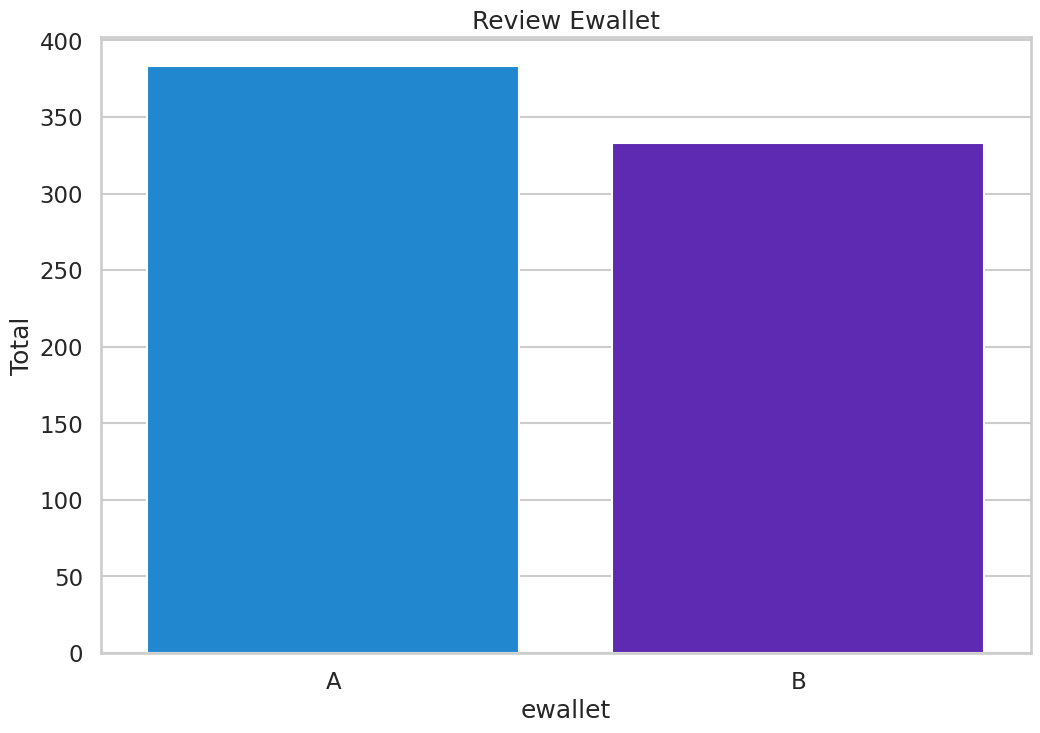

In [ ]:
plt.figure(figsize = (12, 8))
sns.countplot(x = dfstemmed["ewallet"].replace({"DANA": "A", "OVO": "B"}), palette = ['#048cec','#5914c7'], data = dfstemmed)
plt.title('Review Ewallet')
plt.ylabel('Total')
plt.show();

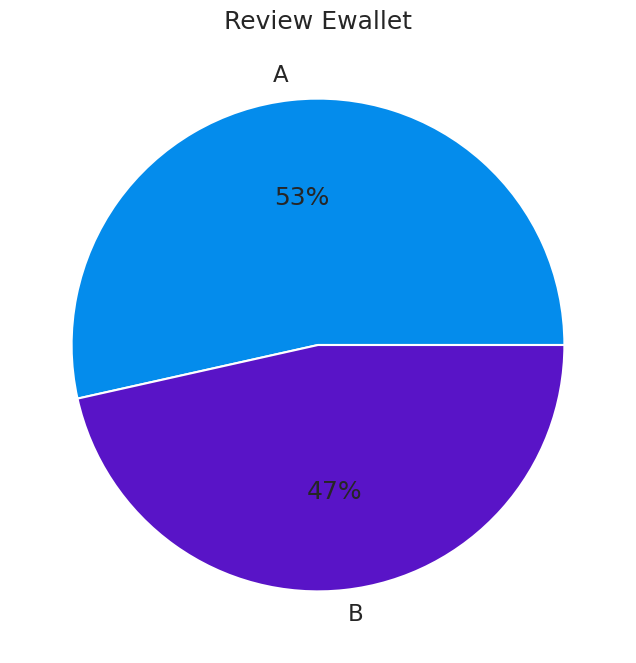

In [ ]:
plt.pie(x = dfstemmed['ewallet'].value_counts(), labels= dfstemmed["ewallet"].replace({"DANA": "A", "OVO": "B"}).unique(), colors = ['#048cec','#5914c7'], autopct='%1.0f%%')
plt.title('Review Ewallet')
plt.show();

Total reviews from two E-Wallets are 700++ reviews

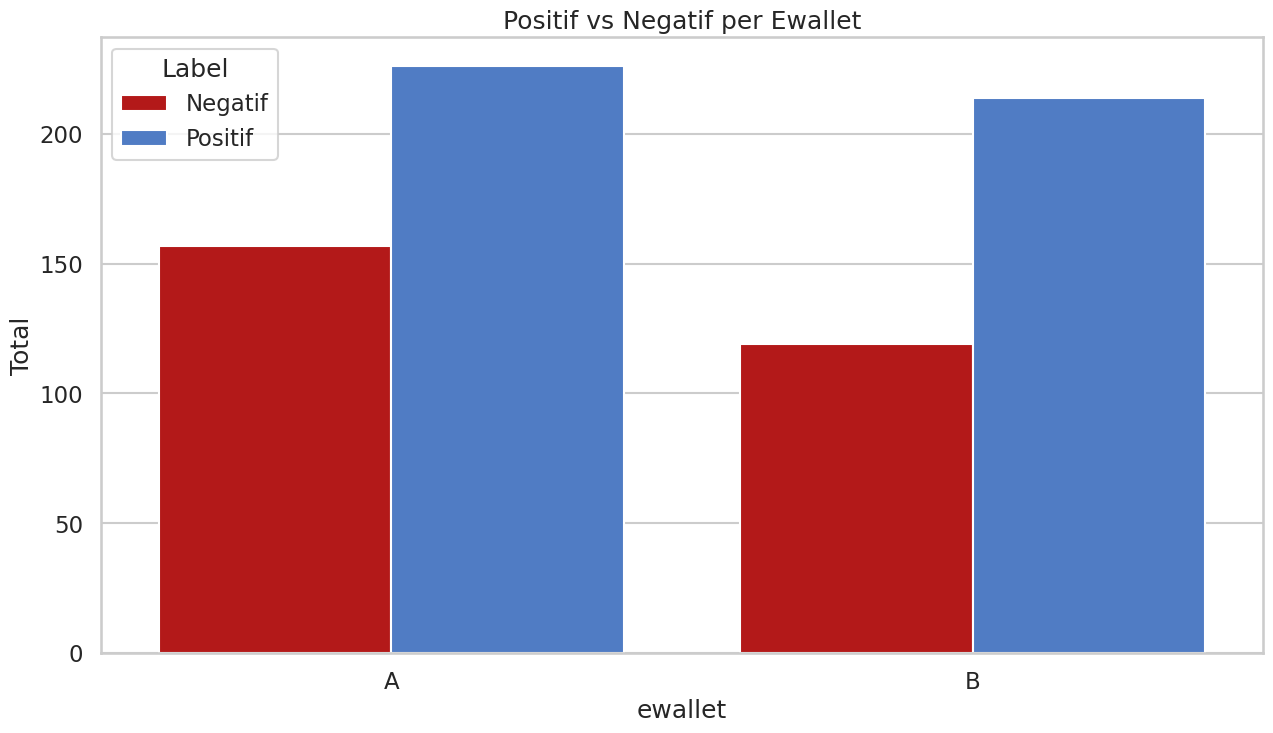

In [ ]:
# Visualizations of Labeled
# Visualize the Label counts
sns.countplot(x=dfstemmed["ewallet"].replace({"DANA": "A", "OVO": "B"}), hue = 'Label', palette = my_palet, data=dfstemmed)
plt.title("Positif vs Negatif per Ewallet", fontsize=18)
plt.ylabel('Total')
plt.show();

About 60 - 64 % of comments are Positive from all reviews

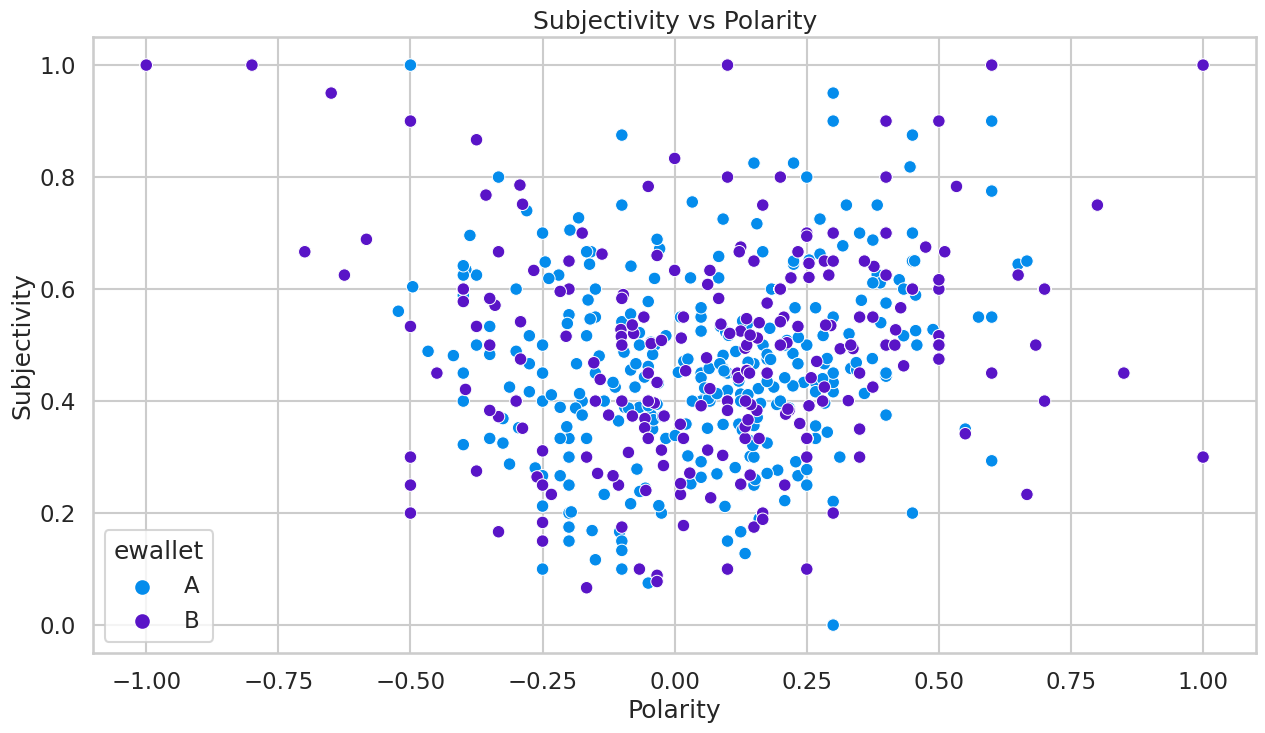

In [ ]:
# Visualize the Polarity scores
sns.scatterplot(x="Polarity", y="Subjectivity", hue=dfstemmed["ewallet"].replace({"DANA": "A", "OVO": "B"}), palette =  ['#048cec','#5914c7'], data=dfstemmed)
plt.title("Subjectivity vs Polarity", fontsize=18)
plt.show();

In [ ]:
# Convert Label to Number
# 0= Negatif, 1=Positif

# Encode the labels
le = LabelEncoder()
dfstemmed["Label_angka"] = le.fit_transform(dfstemmed["Label"])

# Display the encoded labels
display(dfstemmed[["Label_angka","Label"]].head(6))

,Label_angka,Label
0,1,Positif
1,0,Negatif
2,0,Negatif
3,0,Negatif
4,1,Positif
5,1,Positif


##DANA

In [ ]:
# Install the libraries
!pip install gensim pandas nltk

# Import the required modules
from gensim import corpora, models
import pandas as pd
from nltk.stem import PorterStemmer

In [ ]:
dfdana_1 = dfstemmed[(dfstemmed['ewallet']=='DANA') & (dfstemmed['Label_angka']== 1)]
dfdana_0 = dfstemmed[(dfstemmed['ewallet']=='DANA') & (dfstemmed['Label_angka']== 0)]
dfdana = dfstemmed[(dfstemmed['ewallet']=='DANA')]

In [ ]:
dfdana_1.shape

(226, 7)

In [ ]:
dfdana_0.shape

(157, 7)

In [ ]:
dfdana.shape

(383, 7)

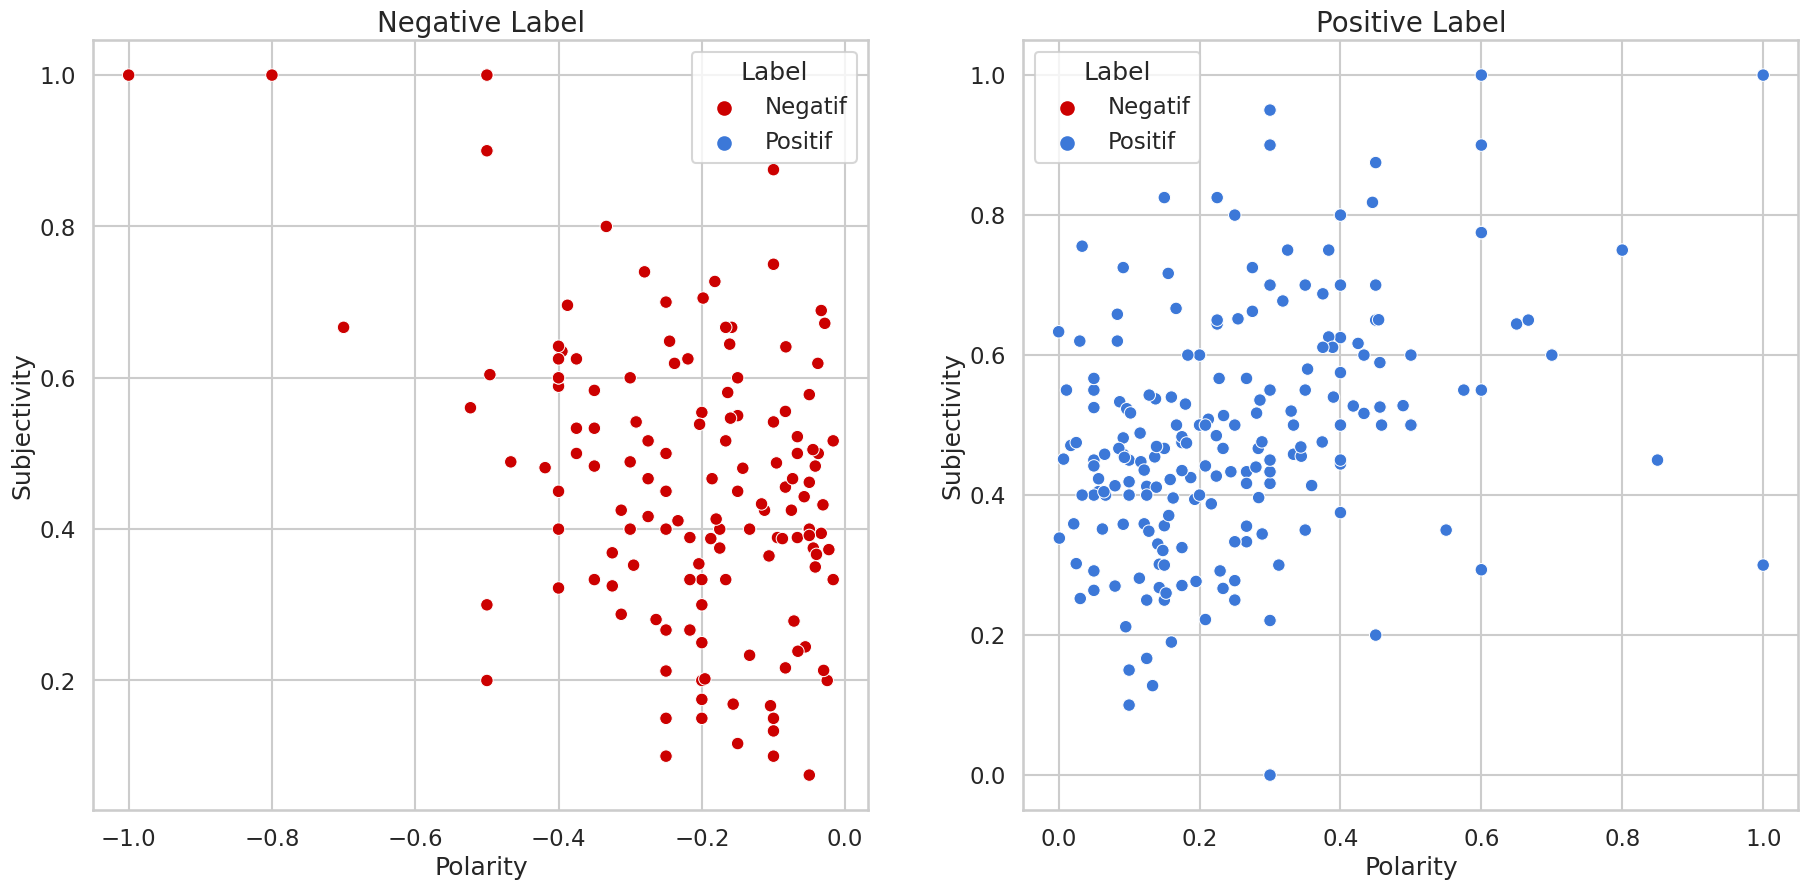

In [ ]:
plt.figure(figsize = (22, 10))
plt.subplot(1,2,1)
sns.scatterplot(x="Polarity", y="Subjectivity", hue="Label", palette = my_palet, data=dfdana_0)
plt.title('Negative Label', fontsize=20)
plt.subplot(1,2,2)
sns.scatterplot(x="Polarity", y="Subjectivity", hue="Label", palette = my_palet, data=dfdana_1)
plt.title('Positive Label', fontsize=20)
plt.show();

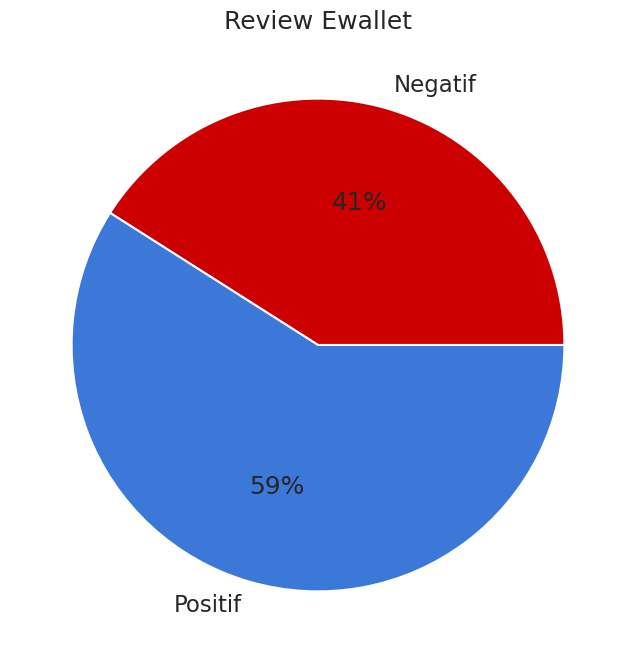

In [ ]:
plt.pie(x = dfdana['Label'].value_counts().sort_values(ascending=True), labels= dfdana['Label'].unique().sort_values(ascending=True), colors = my_palet, autopct='%1.0f%%')
plt.title('Review Ewallet')
plt.show();

In [ ]:
#DANA Positif

# Define the documents
documents = dfdana_1["msg_stemmed"].tolist()

# Stem the documents
stemmer = PorterStemmer()
stemmed_documents = [[stemmer.stem(word) for word in doc.split()] for doc in documents]

# Create a dictionary of the documents
dictionary = corpora.Dictionary(stemmed_documents)

# Define the corpus
corpus = [dictionary.doc2bow(doc) for doc in stemmed_documents]

# Train the LDA model
lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary)

# Print the topics
for topic in lda_model.print_topics():
    print(topic)

(0, '0.035*"app," + 0.020*"use," + 0.010*"dana," + 0.010*"pleas," + 0.009*"tri," + 0.008*"make," + 0.008*"payment," + 0.008*"get," + 0.007*"time," + 0.007*"alway,"')
(1, '0.025*"use," + 0.019*"app," + 0.009*"account," + 0.009*"top," + 0.008*"transfer," + 0.008*"bank," + 0.008*"easi," + 0.007*"dana," + 0.007*"pay," + 0.006*"make,"')
(2, '0.030*"app," + 0.019*"use," + 0.017*"dana," + 0.009*"transact," + 0.009*"problem," + 0.009*"money," + 0.008*"time," + 0.008*"servic," + 0.008*"account," + 0.008*"even,"')


In [ ]:
#DANA Negatif

# Define the documents
documents = dfdana_0["msg_stemmed"].tolist()

# Stem the documents
stemmer = PorterStemmer()
stemmed_documents = [[stemmer.stem(word) for word in doc.split()] for doc in documents]

# Create a dictionary of the documents
dictionary = corpora.Dictionary(stemmed_documents)

# Define the corpus
corpus = [dictionary.doc2bow(doc) for doc in stemmed_documents]

# Train the LDA model
lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary)

# Print the topics
for topic in lda_model.print_topics():
    print(topic)

(0, '0.036*"app," + 0.020*"use," + 0.014*"bad," + 0.013*"tri," + 0.011*"dana," + 0.009*"alway," + 0.008*"still," + 0.008*"account," + 0.008*"updat," + 0.008*"transact,"')
(1, '0.017*"app," + 0.013*"account," + 0.010*"transact," + 0.009*"use," + 0.008*"email," + 0.008*"fail," + 0.008*"alway," + 0.007*"tri," + 0.007*"servic," + 0.007*"still,"')
(2, '0.023*"app," + 0.014*"dana," + 0.012*"custom," + 0.010*"servic," + 0.010*"premium," + 0.010*"account," + 0.010*"time," + 0.009*"use," + 0.009*"money," + 0.009*"even,"')


##OVO

In [ ]:
dfovo_1 = dfstemmed[(dfstemmed['ewallet']=='OVO') & (dfstemmed['Label_angka']== 1)]
dfovo_0 = dfstemmed[(dfstemmed['ewallet']=='OVO') & (dfstemmed['Label_angka']== 0)]
dfovo = dfstemmed[(dfstemmed['ewallet']=='OVO')]

In [ ]:
dfovo_1.shape

(214, 7)

In [ ]:
dfovo_0.shape

(119, 7)

In [ ]:
dfovo.shape

(333, 7)

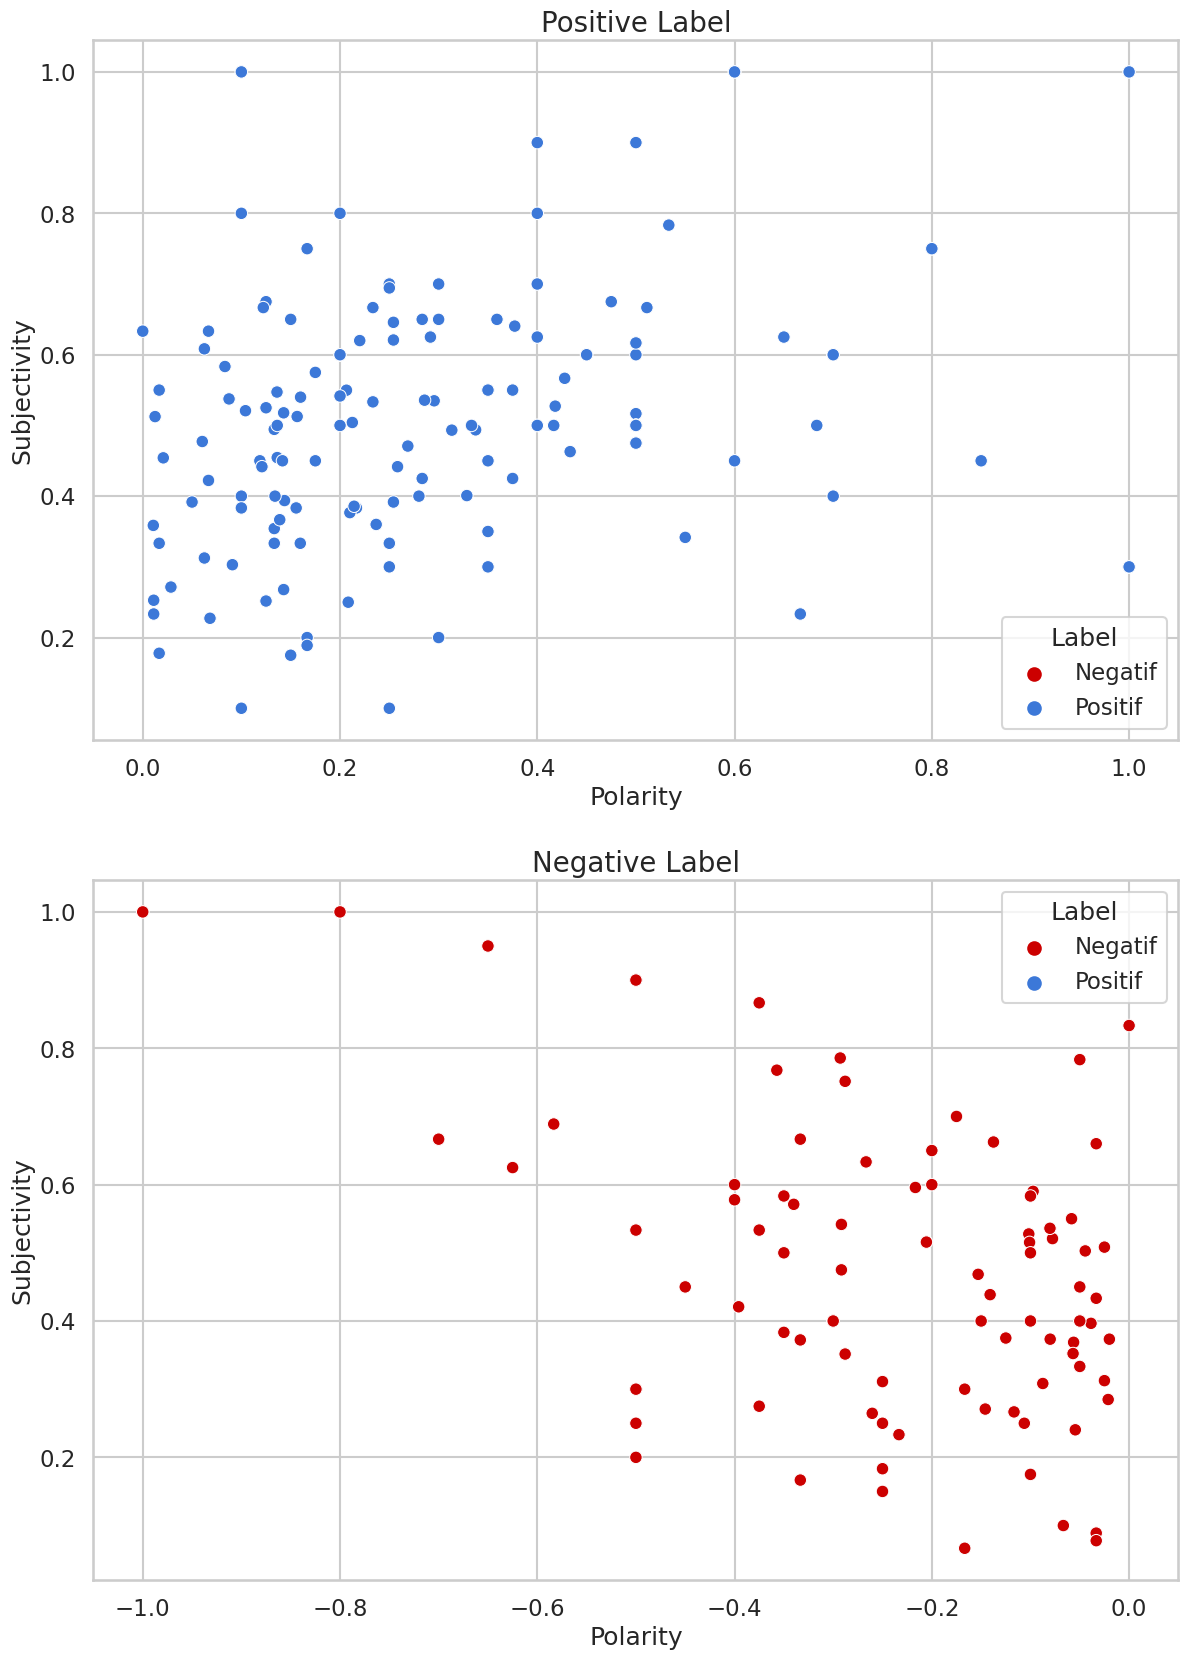

In [ ]:
plt.figure(figsize = (14, 20))
plt.subplot(2,1,1)
sns.scatterplot(x="Polarity", y="Subjectivity", hue="Label", palette = my_palet, data=dfovo_1)
plt.title('Positive Label', fontsize=20)
plt.subplot(2,1,2)
sns.scatterplot(x="Polarity", y="Subjectivity", hue="Label", palette = my_palet, data=dfovo_0)
plt.title('Negative Label', fontsize=20)
plt.show();

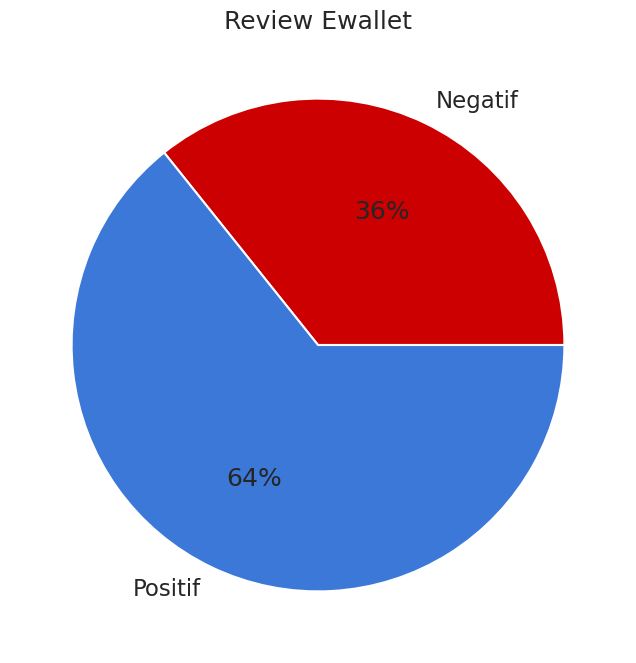

In [ ]:
plt.pie(x = dfovo['Label'].value_counts().sort_values(ascending=True), labels= dfovo['Label'].unique().sort_values(ascending=True), colors = my_palet, autopct='%1.0f%%')
plt.title('Review Ewallet')
plt.show();

In [ ]:
#OVO Positif

# Define the documents
documents = dfovo_1["msg_stemmed"].tolist()

# Stem the documents
stemmer = PorterStemmer()
stemmed_documents = [[stemmer.stem(word) for word in doc.split()] for doc in documents]

# Create a dictionary of the documents
dictionary = corpora.Dictionary(stemmed_documents)

# Define the corpus
corpus = [dictionary.doc2bow(doc) for doc in stemmed_documents]

# Train the LDA model
lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary)

# Print the topics
for topic in lda_model.print_topics():
    print(topic)

(0, '0.036*"app," + 0.012*"tri," + 0.010*"use," + 0.010*"good," + 0.009*"easi," + 0.008*"transfer," + 0.008*"ovo," + 0.008*"phone," + 0.007*"fast," + 0.007*"problem,"')
(1, '0.027*"use," + 0.021*"app," + 0.020*"ovo," + 0.014*"updat," + 0.012*"transact," + 0.012*"easi," + 0.010*"time," + 0.008*"make," + 0.008*"still," + 0.007*"best,"')
(2, '0.022*"app," + 0.020*"ovo," + 0.020*"use," + 0.015*"good," + 0.013*"tri," + 0.012*"account," + 0.010*"easi," + 0.010*"time," + 0.009*"work," + 0.008*"get,"')


In [ ]:
#OVO Negatif

# Define the documents
documents = dfovo_0["msg_stemmed"].tolist()

# Stem the documents
stemmer = PorterStemmer()
stemmed_documents = [[stemmer.stem(word) for word in doc.split()] for doc in documents]

# Create a dictionary of the documents
dictionary = corpora.Dictionary(stemmed_documents)

# Define the corpus
corpus = [dictionary.doc2bow(doc) for doc in stemmed_documents]

# Train the LDA model
lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary)

# Print the topics
for topic in lda_model.print_topics():
    print(topic)

(0, '0.023*"app," + 0.017*"time," + 0.017*"ovo," + 0.012*"servic," + 0.012*"account," + 0.011*"custom," + 0.011*"use," + 0.010*"get," + 0.010*"even," + 0.009*"tri,"')
(1, '0.015*"app," + 0.014*"ovo," + 0.012*"use," + 0.010*"bad," + 0.010*"tri," + 0.010*"phone," + 0.010*"updat," + 0.009*"time," + 0.009*"servic," + 0.007*"got,"')
(2, '0.024*"app," + 0.017*"ovo," + 0.014*"use," + 0.013*"bad," + 0.012*"alway," + 0.012*"tri," + 0.011*"account," + 0.010*"call," + 0.009*"money," + 0.009*"servic,"')


## WordCloud

In [ ]:
# Display the positive coment
display(dfstemmed.sort_values(by=["Polarity", "msg_stemmed"], axis=0, ascending=False)[["Polarity", "msg_stemmed"]].head(5))
# Display the negative coment
display(dfstemmed.sort_values(by=["Polarity", "msg_stemmed"], axis=0, ascending=[True, False])[["Polarity", "msg_stemmed"]].head(5))

,Polarity,msg_stemmed
610,1.0,"superb, easi, secur"
10,1.0,"simpl, perfect"
485,1.0,"ovo, best, cashless, app"
718,1.0,"one, stop, solut, digit, financi, need, best, one"
689,1.0,"iso, easi, use, help, best,"


,Polarity,msg_stemmed
873,-1.0,"think, worst, payment, app, ever, log, account..."
903,-1.0,"hand, worst, custom, servic, ever, solv, probl..."
252,-1.0,"app, get, worst, ive, use, app, almost, 3, yea..."
852,-0.8,"stupid, app, rule, transfer, unus, money, bank..."
932,-0.8,"sinc, stupid, app, instal, never, work, ask, s..."


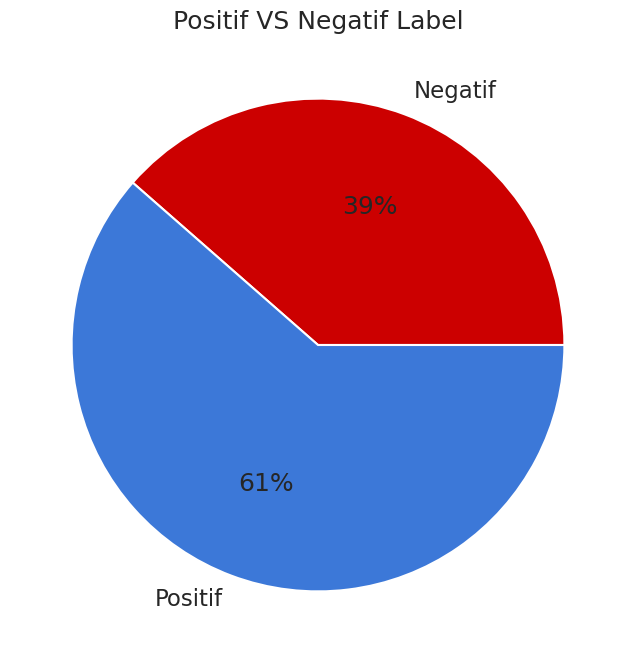

In [ ]:
plt.pie(x = dfstemmed['Label_angka'].value_counts().sort_values(ascending=True), labels= dfstemmed['Label'].unique().sort_values(ascending=True), colors = my_palet, autopct='%1.0f%%')
plt.title('Positif VS Negatif Label')
plt.show();

The results of crawling review apps obtained 946 lines of data, then labeling was carried out with textblob based on polarity and subjectivity and the remaining 716 lines of data. <br>
The results were 61% positive comments and 39% negative comments, from a review of 2 ewallet applications

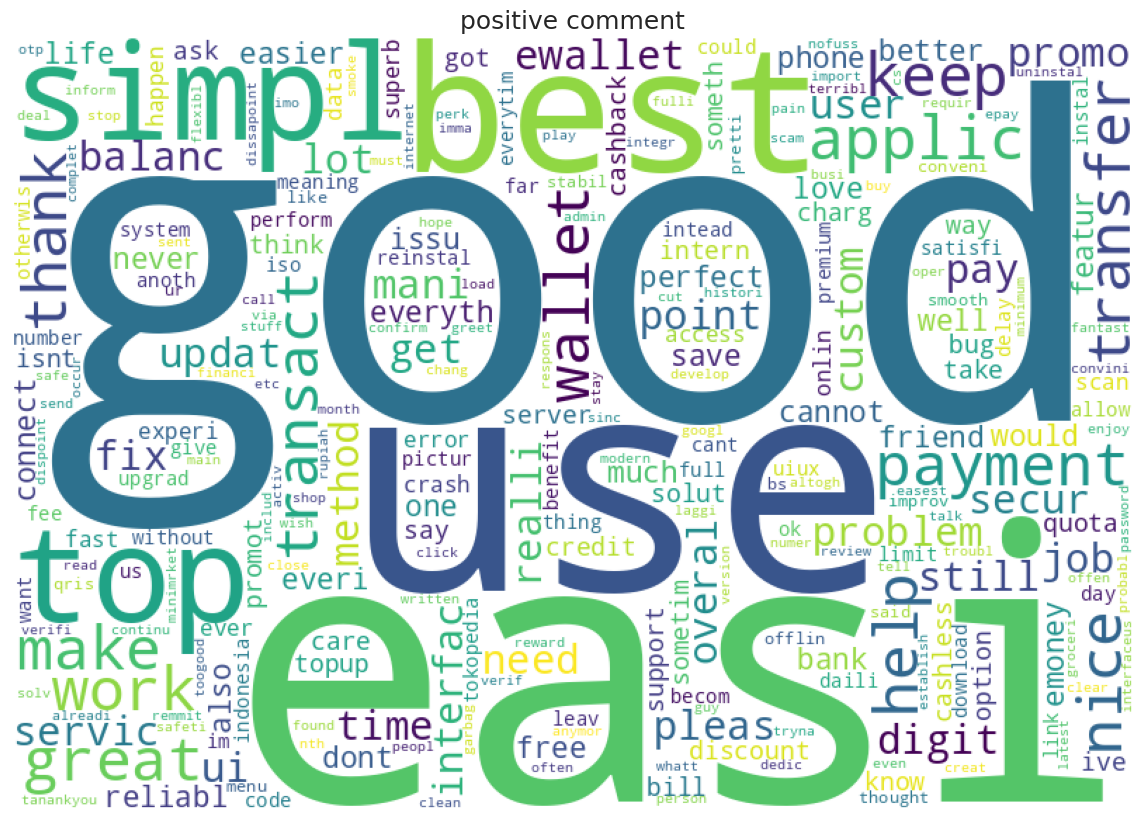

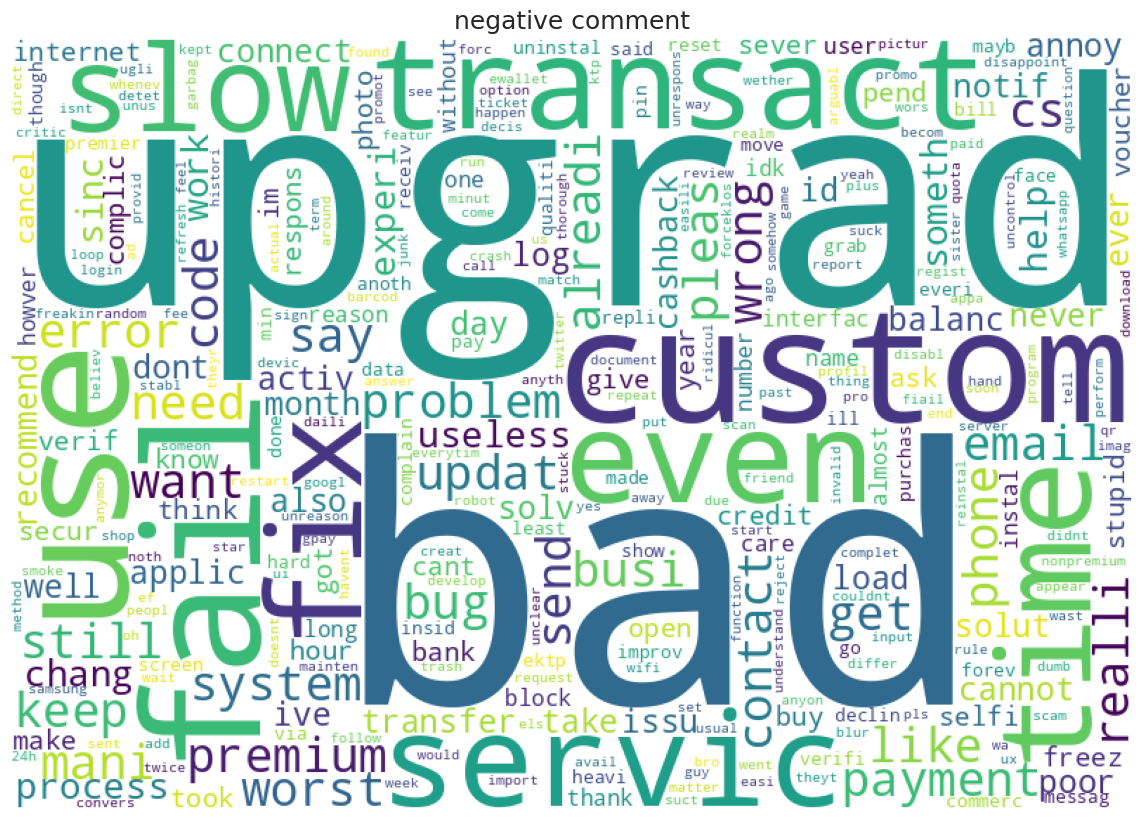

In [ ]:
# Make Word Cloud

def make_wordcloud(data, label):
  tfidf_stops=list_sw
  # Initialize a Tf-idf Vectorizer
  polarity_vectorizer = TfidfVectorizer(max_features=1000, stop_words=tfidf_stops)

  # Fit and transform the vectorizer
  tfidf_matrix_polarity = polarity_vectorizer.fit_transform(data["msg_stemmed"])

  # Create a new DataFrame called frequencies
  frequencies_polarity = pd.DataFrame(tfidf_matrix_polarity.sum(axis=0).T,index=polarity_vectorizer.get_feature_names_out(),columns=['total frequency'])

  # Sort the words by frequency
  frequencies_polarity.sort_values(by='total frequency',ascending=False, inplace=True)

  # Join the indexes
  frequent_words_polarity = " ".join(frequencies_polarity.index)+" "

  # Initialize the word cloud
  wc = WordCloud(width = 800, height = 550, min_font_size = 10, max_words=500, background_color ='white', stopwords= tfidf_stops)

  # Generate the world clouds for each type of label
  comment_polarity = wc.generate(frequent_words_polarity)

  # Plot the world cloud
  #plt.figure(figsize = (10, 10))
  plt.imshow(comment_polarity)
  plt.axis("off")
  plt.title(label +" comment")
  plt.tight_layout(pad = 0)
  plt.show();

# Create DataFrames for each label
positive_popular_df = dfstemmed.sort_values(by=["Polarity"], axis=0, ascending=[False])[["Polarity","msg_stemmed"]].head(100)
negative_popular_df = dfstemmed.sort_values(by=["Polarity"], axis=0, ascending=[True])[["Polarity","msg_stemmed"]].head(100)

# Call the function
make_wordcloud(positive_popular_df, "positive")
make_wordcloud(negative_popular_df, "negative")

- For Positive Comment: E-Wallet is **good**, and **simple** / **easy** to use in payment methods
- For Negative Comment: E-Wallet **needs** to **upgrade** / **update** the system to improve services and bugs


Based on EDA:
- Update features on E-Wallet
- Perform regular maintenance based on new user usage
- Create a new E-Wallet or platform.
